In [2]:
import pandas as pd
import dask.dataframe as dd

/Users/rodri/Desktop/MIT Fall 2024 Classes/6.3950/aidms-loan-approval/newenv/lib/python3.12/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
def inspect_csv(file_path):
    """
    Output basic information about a CSV (works for smaller files)

    Args:
        file_path (str): The path to the CSV file to inspect

    Returns:
        None
    """
    # Load the CSV file
    df = pd.read_csv(file_path)

    print("done reading csv")

    # Display column header names
    print("Column headers:")
    print(df.columns)

    # Display the first 5 rows
    print("\nFirst 5 rows:")
    print(df.head())

    # Display the last 5 rows
    print("\nLast 5 rows:")
    print(df.tail())

    # Display the number of rows and columns
    print("\nNumber of rows and columns:")
    print(df.shape)

In [4]:
def load_hmda_corrected(file_path):
    """
    Inspects the HMDA dataset and returns a Dask DataFrame with corrected dtypes.
    This is a separate function because the main HMDA CSV is too large to load with Pandas.

    Args:
        file_path (str): The path to the HMDA dataset CSV file
    
    Returns:
        None
    """
    # Define explicit dtypes for problematic columns
    dtype = {
        'applicant_race_name_2': 'object',
        'applicant_race_name_3': 'object',
        'applicant_race_name_4': 'object',
        'applicant_race_name_5': 'object',
        'co_applicant_race_name_2': 'object',
        'co_applicant_race_name_3': 'object',
        'co_applicant_race_name_4': 'object',
        'co_applicant_race_name_5': 'object',
        'county_code': 'float64',  # Allow for NA
        'denial_reason_name_2': 'object',
        'denial_reason_name_3': 'object',
        'hud_median_family_income': 'float64',  # Allow for NA
        'loan_amount_000s': 'float64',  # Allow for NA
        'msamd': 'float64',  # Allow for NA
        'number_of_1_to_4_family_units': 'float64',  # Allow for NA
        'number_of_owner_occupied_units': 'float64',  # Allow for NA
        'population': 'float64',  # Allow for NA
        'state_code': 'float64',  # Allow for NA
    }

    # Load the CSV with the specified dtypes
    df = dd.read_csv(file_path, dtype=dtype)

    # Display column headers
    print("Column headers:")
    print(df.columns)

    # Display the first 5 rows
    print("\nFirst 5 rows:")
    print(df.head(5))

    # Display the last 5 rows
    print("\nLast 5 rows:")
    print(df.tail(5))  # No need for .compute()

    # Display the number of rows and columns
    print("\nNumber of rows and columns:")
    rows, cols = df.shape
    print(f"Rows: {rows.compute()}, Columns: {cols}")


In [ ]:
# main, large CSV file

load_hmda_corrected('../HDMA/hmda_2017_nationwide_all-records_labels.csv')

Column headers:
Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_appl

/Users/rodri/Desktop/MIT Fall 2024 Classes/6.3950/aidms-loan-approval/newenv/lib/python3.12/site-packages/dask/dataframe/io/csv.py:197: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Rows: 14285496, Columns: 78


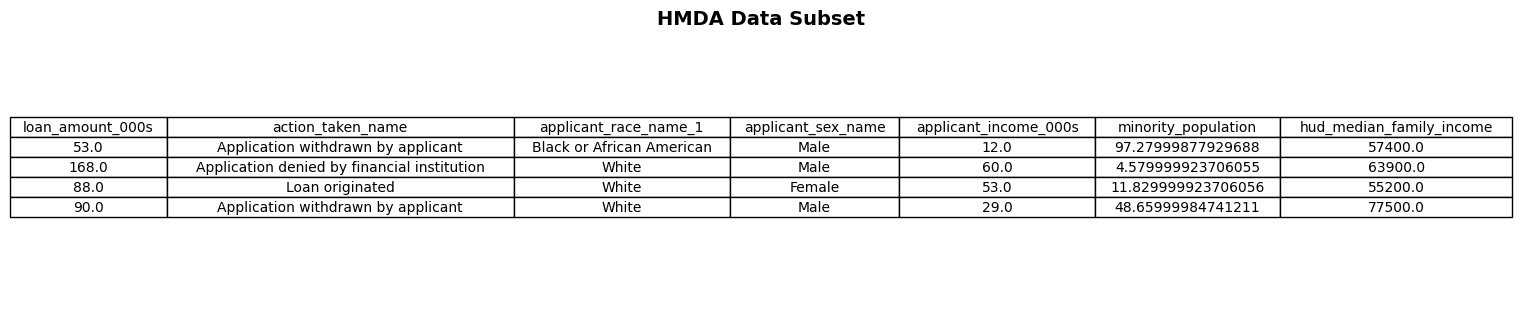

In [17]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

def visualize_hmda_data_with_theme(file_path, columns, n_rows=5, bg_color="black", text_color="white"):
    """
    Visualizes the specified columns and rows of the HMDA dataset as a styled table with custom colors.

    Args:
        file_path (str): The path to the HMDA dataset CSV file.
        columns (list of str): The list of column names to display.
        n_rows (int): The number of rows to display (default is 5).
        bg_color (str): The background color of the plot (default is "black").
        text_color (str): The text color for the table (default is "white").
    
    Returns:
        None
    """
    # Explicitly specify dtypes for problematic columns
    dtype = {
        'applicant_race_name_2': 'object',
        'applicant_race_name_3': 'object',
        'applicant_race_name_4': 'object',
        'applicant_race_name_5': 'object',
        'co_applicant_race_name_2': 'object',
        'co_applicant_race_name_3': 'object',
        'co_applicant_race_name_4': 'object',
        'co_applicant_race_name_5': 'object',
        'county_code': 'float64',
        'denial_reason_name_2': 'object',
        'denial_reason_name_3': 'object',
        'hud_median_family_income': 'float64',
        'loan_amount_000s': 'float64',
        'msamd': 'float64',
        'number_of_1_to_4_family_units': 'float64',
        'number_of_owner_occupied_units': 'float64',
        'population': 'float64',
        'state_code': 'float64'
    }

    # Load the dataset with the corrected dtypes
    df = dd.read_csv(file_path, dtype=dtype)[columns].head(n_rows)

    # Convert to Pandas DataFrame for visualization
    df = pd.DataFrame(df)

    # drop the third row
    df = df.drop([2])
    
    # Create a Matplotlib figure
    fig, ax = plt.subplots(figsize=(len(columns) * 1.5, n_rows * 0.7))
    
    # Set background and text colors
    fig.patch.set_facecolor(bg_color)
    ax.set_facecolor(bg_color)
    ax.axis('tight')
    ax.axis('off')
    
    # Add a table to the plot
    table = plt.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        colColours=[bg_color] * len(columns)
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(columns))))
    table.scale(1.2, 1.2)  # Adjust the scaling for better readability
    
    # Update cell and text colors
    for key, cell in table.get_celld().items():
        cell.set_facecolor(bg_color)
        cell.set_text_props(color=text_color)
    
    plt.title("HMDA Data Subset", fontsize=14, weight='bold', color=text_color)
    plt.show()

# Example usage
visualize_hmda_data_with_theme(
    file_path='../HDMA/hmda_2017_nationwide_all-records_labels.csv',
    columns = [
    "loan_amount_000s",
    "action_taken_name",
    "applicant_race_name_1",
    "applicant_sex_name",
    "applicant_income_000s",
    "minority_population",
    "hud_median_family_income"
    ],
    n_rows=5,
    bg_color="white",
    text_color="black"
)


In [ ]:
# finds the mapping from 'applicant_sex_name' to 'applicant_sex'. applicant_Sex has values 1-4, while applicant_sex_name uses the actual name
# want to know which maps to which

def find_mapping(file_path):
    """
    Finds the mapping between 'applicant_sex_name' and 'applicant_sex' columns in the HMDA dataset.

    Args:
        file_path (str): The path to the HMDA dataset CSV file.

    Returns:
        None
    """
    # Explicitly specify dtypes for problematic columns
    dtype = {
        'applicant_race_name_2': 'object',
        'applicant_race_name_3': 'object',
        'applicant_race_name_4': 'object',
        'applicant_race_name_5': 'object',
        'co_applicant_race_name_2': 'object',
        'co_applicant_race_name_3': 'object',
        'co_applicant_race_name_4': 'object',
        'co_applicant_race_name_5': 'object',
        'county_code': 'float64',
        'denial_reason_name_2': 'object',
        'denial_reason_name_3': 'object',
        'hud_median_family_income': 'float64',
        'loan_amount_000s': 'float64',
        'msamd': 'float64',
        'number_of_1_to_4_family_units': 'float64',
        'number_of_owner_occupied_units': 'float64',
        'population': 'float64',
        'state_code': 'float64'
    }

    # Load the dataset with the corrected dtypes
    df = dd.read_csv(file_path, dtype=dtype)[['applicant_sex_name', 'applicant_sex']].drop_duplicates()

    # Convert to Pandas DataFrame for visualization
    df = pd.DataFrame(df)

    # Display the mapping between 'applicant_sex_name' and 'applicant_sex'
    print(df)

# Example usage
find_mapping('../HDMA/hmda_2017_nationwide_all-records_labels.csv')

                                                   0  1
0                                               Male  1
1                                             Female  2
2  Information not provided by applicant in mail,...  3
3                                     Not applicable  4


In [23]:
# inspect hmda_2017_panel.csv

inspect_csv('../HDMA/hmda_2017_panel.csv')

done reading csv
Column headers:
Index(['Activity Year', 'Respondent ID', 'Agency Code', 'Parent Respondent ID',
       'Parent Name (Panel)', 'Parent City (Panel)', 'Parent State (Panel)',
       'Region', 'Assets', 'Other Lender Code', 'Respondent Name (Panel)',
       'Respondent City (Panel)', 'Respondent State (Panel)',
       'Top Holder RSSD ID', 'Top Holder Name', 'Top Holder City',
       'Top Holder State', 'Top Holder Country', 'Respondent RSSD ID',
       'Parent RSSD ID', 'Respondent FIPS State Number'],
      dtype='object')

First 5 rows:
   Activity Year Respondent ID  Agency Code  Parent Respondent ID  \
0           2017    0002736291            9             2138466.0   
1           2017    0003783948            9             3226762.0   
2           2017    0000722777            9             3981856.0   
3           2017    0000212465            9             1378434.0   
4           2017    0003212149            9             2967509.0   

                  Parent 

In [24]:
# hmda_2017_transmittal_sheet.csv

inspect_csv('../HDMA/hmda_2017_transmittal_sheet.csv')

done reading csv
Column headers:
Index(['Activity Year', ' Respondent ID', ' Agency Code', ' Federal Tax ID',
       ' Respondent Name', ' Respondent Mailing Address', ' Respondent City',
       ' Respondent State', ' Respondent ZIP Code', ' Parent Name',
       ' Parent Address', ' Parent City', ' Parent State', ' Parent ZIP Code',
       'LAR Count'],
      dtype='object')

First 5 rows:
   Activity Year  Respondent ID   Agency Code  Federal Tax ID  \
0           2017     0000011286             3      59-0238640   
1           2017     0000033542             3      87-0489793   
2           2017     0000001821             3      35-0318380   
3           2017     0000004122             5      46-0242124   
4           2017     0000058874             3      26-2218160   

                 Respondent Name  Respondent Mailing Address  Respondent City  \
0       Farmers & Merchants Bank    200 E. Washington Street       Monticello   
1               ROCK CANYON BANK            215 W 2230